# usALEX-5samples - HDF5 conversion
> *This notebook converts the us-ALEX `.sm` data file into [Photon-HDF5](http://photon-hdf5.readthedocs.org/) file format.*

In [1]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

In [2]:
import phconvert as phc
phc.__version__

'0.7.1'

# Data files

Paste here the folder containing the `.sm` files to convert:

In [3]:
data_dir = r'C:\Data\Antonio\data/8-spot 5samples data/2012-12-06/'

This is the list of the files that will be converted:

In [4]:
file_list = glob(data_dir + '*.sm')
file_list

['C:\\Data\\Antonio\\data/8-spot 5samples data/2012-12-06\\001_17d_100_40_po.sm',
 'C:\\Data\\Antonio\\data/8-spot 5samples data/2012-12-06\\001_22d_100_40_pe.sm',
 'C:\\Data\\Antonio\\data/8-spot 5samples data/2012-12-06\\001_4 Channel Dark Count.sm',
 'C:\\Data\\Antonio\\data/8-spot 5samples data/2012-12-06\\002_17d_100_40_pe.sm',
 'C:\\Data\\Antonio\\data/8-spot 5samples data/2012-12-06\\002_22d_100_40_po.sm',
 'C:\\Data\\Antonio\\data/8-spot 5samples data/2012-12-06\\003_17d_100_40_po.sm',
 'C:\\Data\\Antonio\\data/8-spot 5samples data/2012-12-06\\003_27d_100_40_po.sm',
 'C:\\Data\\Antonio\\data/8-spot 5samples data/2012-12-06\\004_27d_100_40_pe.sm',
 'C:\\Data\\Antonio\\data/8-spot 5samples data/2012-12-06\\005_17d_100_40_pe.sm',
 'C:\\Data\\Antonio\\data/8-spot 5samples data/2012-12-06\\006_17d_100_40_po.sm',
 'C:\\Data\\Antonio\\data/8-spot 5samples data/2012-12-06\\008_12d_100_40_po.sm',
 'C:\\Data\\Antonio\\data/8-spot 5samples data/2012-12-06\\009_12d_100_40_pe.sm',
 'C:\\Dat

# Author

In [5]:
author = 'Francesco Panzeri'
author_affiliation = 'UCLA'
creator = 'Antonino Ingargiola'
creator_affiliation = 'UCLA'

# Sample

In [6]:
description = 'dsDNA with D-A separation of %d base-pairs, %s SPADs.'
sample_name = 'Doubly-labeled 40-bp dsDNA, D-A separation %d base-pairs.'
dye_names = 'ATTO550, ATTO647N'
buffer_name = 'TE50'

# Test one file

In [7]:
import re

In [8]:
bp_pattern = '.+_([0-9]{1,2})d_.+'

In [9]:
filename = file_list[0]
spad_name = 'POLIMI RE' if filename[:-3].endswith('po') else 'PerkinElmer'
sample_bp = int(re.match(bp_pattern, filename).group(1))
spad_name, sample_bp

('POLIMI RE', 17)

In [10]:
d = phc.loader.usalex_sm(filename,
                         donor = 0,
                         acceptor = 1,
                         alex_period = 4000,
                         alex_offset = 700,
                         alex_period_donor = (2150, 3900),
                         alex_period_acceptor = (200, 1900),
                         excitation_wavelengths = (532e-9, 635e-9),
                         detection_wavelengths = (580e-9, 680e-9))

 - Loading 'C:\Data\Antonio\data/8-spot 5samples data/2012-12-06\001_17d_100_40_po.sm' ... 
 [DONE]



In [11]:
ph_data = d['photon_data']
det = ph_data['detectors']
timestamps = ph_data['timestamps']

In [12]:
np.unique(det)

array([0, 1, 2], dtype=uint32)

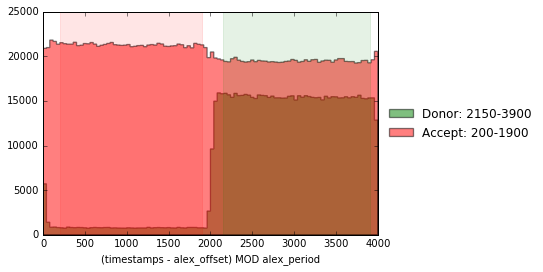

In [13]:
phc.plotter.alternation_hist(d)

## Add author and sample info

In [14]:
d['description'] = description % (sample_bp, spad_name)

d['sample'] = dict(
    sample_name=sample_name % sample_bp,
    dye_names=dye_names,
    buffer_name=buffer_name,
    num_dyes = len(dye_names.split(',')))

d['identity'] = dict(
    author=author,
    author_affiliation=author_affiliation,
    creator=creator,
    creator_affiliation=creator_affiliation)

## Add monitor channel

Add a user-field for the monitor channel:

In [15]:
d['photon_data']['measurement_specs']['detectors_specs']['user'] = dict(monitor=2)

field_description = {'/photon_data/measurement_specs/detectors_specs/user/monitor':
                     'Channel used as laser power monitor.'}

In [16]:
phc.hdf5.save_photon_hdf5(d, user_descr=field_description)

Saving: C:\Data\Antonio\data/8-spot 5samples data/2012-12-06\001_17d_100_40_po_new_copy.hdf5


## Convert all the files

In [18]:
field_description = {'/photon_data/measurement_specs/detectors_specs/user/monitor':
                     'Channel used as laser power monitor.'}

for filename in file_list:
    if 'Channel Dark Count' in filename: continue
    

    spad_name = 'POLIMI RE' if filename[:-3].endswith('po') else 'PerkinElmer'
    sample_bp = int(re.match(bp_pattern, filename).group(1))
    print(spad_name, sample_bp, '\t', filename)

    d = phc.loader.usalex_sm(filename,
                         donor = 0,
                         acceptor = 1,
                         alex_period = 4000,
                         alex_offset = 700,
                         alex_period_donor = (2150, 3900),
                         alex_period_acceptor = (200, 1900),
                         excitation_wavelengths = (532e-9, 635e-9),
                         detection_wavelengths = (580e-9, 680e-9))

    
    d['description'] = description % (sample_bp, spad_name)

    d['sample'] = dict(
        sample_name=sample_name % sample_bp,
        dye_names=dye_names,
        buffer_name=buffer_name,
        num_dyes = len(dye_names.split(',')))


    d['identity'] = dict(
        author=author,
        author_affiliation=author_affiliation,
        creator=creator,
        creator_affiliation=creator_affiliation)
    
    d['photon_data']['measurement_specs']['detectors_specs']['user'] = dict(monitor=2)

    phc.hdf5.save_photon_hdf5(d, overwrite=True, user_descr=field_description)

POLIMI RE 17 	 C:\Data\Antonio\data/8-spot 5samples data/2012-12-06\001_17d_100_40_po.sm
 - Loading 'C:\Data\Antonio\data/8-spot 5samples data/2012-12-06\001_17d_100_40_po.sm' ... 
 [DONE]

Saving: C:\Data\Antonio\data/8-spot 5samples data/2012-12-06\001_17d_100_40_po.hdf5
PerkinElmer 22 	 C:\Data\Antonio\data/8-spot 5samples data/2012-12-06\001_22d_100_40_pe.sm
 - Loading 'C:\Data\Antonio\data/8-spot 5samples data/2012-12-06\001_22d_100_40_pe.sm' ... 
 [DONE]

Saving: C:\Data\Antonio\data/8-spot 5samples data/2012-12-06\001_22d_100_40_pe.hdf5
PerkinElmer 17 	 C:\Data\Antonio\data/8-spot 5samples data/2012-12-06\002_17d_100_40_pe.sm
 - Loading 'C:\Data\Antonio\data/8-spot 5samples data/2012-12-06\002_17d_100_40_pe.sm' ... 
 [DONE]

Saving: C:\Data\Antonio\data/8-spot 5samples data/2012-12-06\002_17d_100_40_pe.hdf5
POLIMI RE 22 	 C:\Data\Antonio\data/8-spot 5samples data/2012-12-06\002_22d_100_40_po.sm
 - Loading 'C:\Data\Antonio\data/8-spot 5samples data/2012-12-06\002_22d_100_40_po.sm

# Convert DCR file

In [6]:
filename = [f for f in file_list if 'Channel Dark Count' in f][0]
filename

'C:\\Data\\Antonio\\data/8-spot 5samples data/2012-12-06\\001_4 Channel Dark Count.sm'

In [7]:
def dcr_loader(
        filename,
        software='LabVIEW Data Acquisition usALEX'):
    """Return a dictionary containing DCR data from a .sm file
    
    This dictionary can be passed to the :func:`phconvert.hdf5.save_photon_hdf5`
    function to save the data in Photon-HDF5 format.
    """
    print(" - Loading '%s' ... " % filename)
    timestamps, detectors, labels = phc.smreader.load_sm(filename,
                                                         return_labels=True)
    print(" [DONE]\n")

    photon_data = dict(
        timestamps = timestamps,
        timestamps_specs = dict(timestamps_unit=12.5e-9),
        detectors = detectors)

    setup = dict(
        num_pixels = 4)
    
    provenance = dict(filename=filename, software=software)
    acquisition_duration = (timestamps[-1] - timestamps[0]) * 12.5e-9
    data = dict(
        _filename = filename,
        acquisition_duration = round(acquisition_duration),
        photon_data = photon_data,
        setup = setup,
        provenance = provenance)

    return data, labels

In [8]:
d, labels = dcr_loader(filename)

 - Loading 'C:\Data\Antonio\data/8-spot 5samples data/2012-12-06\001_4 Channel Dark Count.sm' ... 
 [DONE]



In [9]:
labels

[b'POG', b'POR', b'PEG', b'PER']

In [10]:
det = d['photon_data']['detectors']
np.unique(det)

array([0, 1, 2, 3], dtype=uint32)

In [11]:
d['description'] = 'Dark counts acquisition for 4 SPADs, in order: MPD SPAD (donor), MPD RE-SPAD (acceptor), Perkin-Elmer (donor), Perkin-Elmer (acceptor).'

d['identity'] = dict(
    author=author,
    author_affiliation=author_affiliation,
    creator=creator,
    creator_affiliation=creator_affiliation)

In [12]:
phc.hdf5.save_photon_hdf5(d, require_setup=False, overwrite=True)

Saving: C:\Data\Antonio\data/8-spot 5samples data/2012-12-06\001_4 Channel Dark Count.hdf5
Photon-HDF5 WARNING: Missing field "measurement_specs" in "/photon_data".


In [13]:
d['provenance']

{'creation_time': '2014-08-20 10:31:26',
 'filename': '001_4 Channel Dark Count.sm',
 'filename_full': 'C:\\Data\\Antonio\\data\\8-spot 5samples data\\2012-12-06\\001_4 Channel Dark Count.sm',
 'modification_time': '2012-12-06 13:31:39',
 'software': 'LabVIEW Data Acquisition usALEX'}

# Load the converted files

In [19]:
from fretbursts import *

 - Optimized (cython) burst search loaded.
 - Optimized (cython) photon counting loaded.
--------------------------------------------------------------
 You are running FRETBursts (version 0.5.1+10.g808d611).

 If you use this software in a publication, please cite it as:

   FRETBursts - An opensource single-molecule FRET bursts analysis toolkit.
   A. Ingargiola 2014. http://tritemio.github.io/FRETBursts

--------------------------------------------------------------


C:\Users\laser2002j\Miniconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [20]:
from IPython.display import display

C:\Data\Antonio\data/8-spot 5samples data/2012-12-06\001_17d_100_40_po.hdf5
#donor: 711334  #acceptor: 1757496 

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
   [DONE Counting D/A]


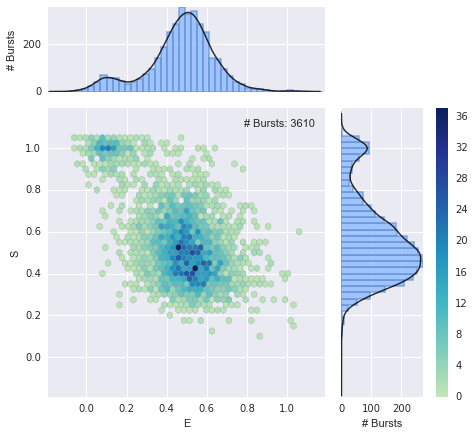

C:\Data\Antonio\data/8-spot 5samples data/2012-12-06\001_22d_100_40_pe.hdf5
#donor: 1703247  #acceptor: 2679997 

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
   [DONE Counting D/A]


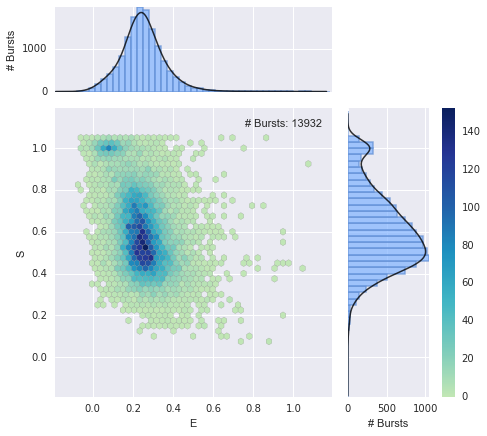

C:\Data\Antonio\data/8-spot 5samples data/2012-12-06\001_4 Channel Dark Count.hdf5
C:\Data\Antonio\data/8-spot 5samples data/2012-12-06\002_17d_100_40_pe.hdf5
#donor: 1084705  #acceptor: 1744878 

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
   [DONE Counting D/A]


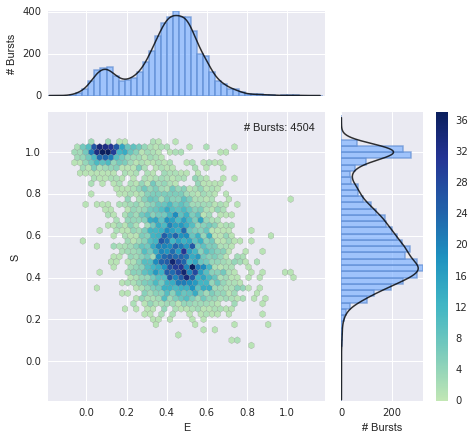

C:\Data\Antonio\data/8-spot 5samples data/2012-12-06\002_22d_100_40_po.hdf5
#donor: 1227051  #acceptor: 2370173 

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
   [DONE Counting D/A]


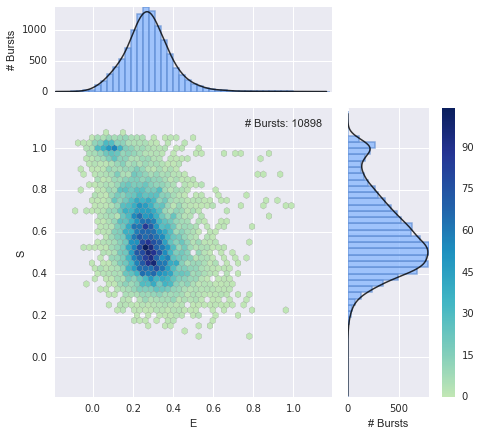

C:\Data\Antonio\data/8-spot 5samples data/2012-12-06\003_17d_100_40_po.hdf5
#donor: 892583  #acceptor: 1727172 

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
   [DONE Counting D/A]


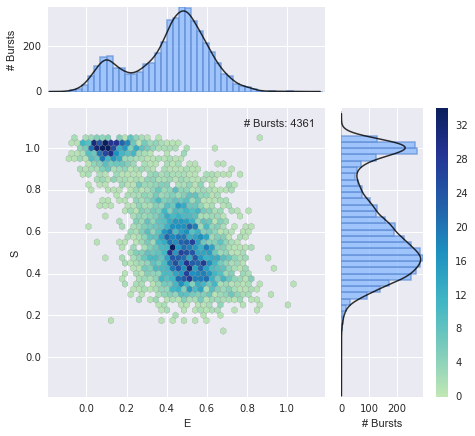

C:\Data\Antonio\data/8-spot 5samples data/2012-12-06\003_27d_100_40_po.hdf5
#donor: 1208972  #acceptor: 2016317 

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
   [DONE Counting D/A]


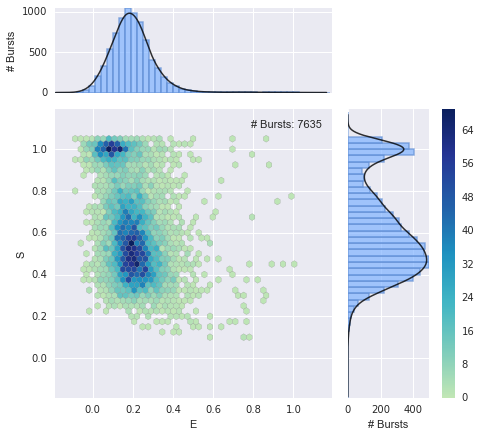

C:\Data\Antonio\data/8-spot 5samples data/2012-12-06\004_27d_100_40_pe.hdf5
#donor: 1656496  #acceptor: 2207941 

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
   [DONE Counting D/A]


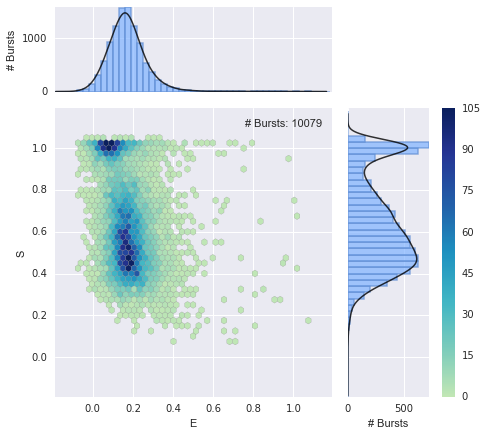

C:\Data\Antonio\data/8-spot 5samples data/2012-12-06\005_17d_100_40_pe.hdf5
#donor: 1962710  #acceptor: 3220873 

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
   [DONE Counting D/A]


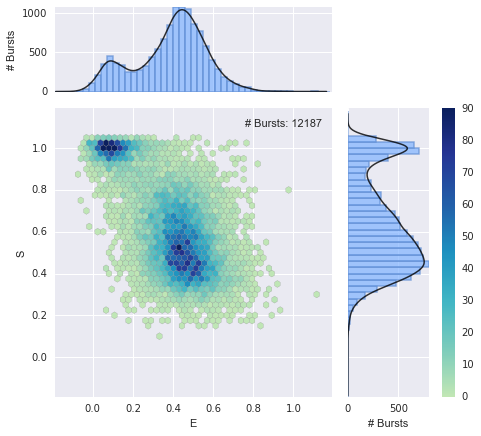

C:\Data\Antonio\data/8-spot 5samples data/2012-12-06\006_17d_100_40_po.hdf5
#donor: 1493958  #acceptor: 2797617 

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
   [DONE Counting D/A]


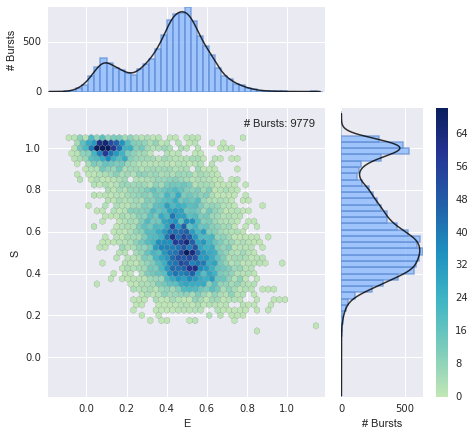

C:\Data\Antonio\data/8-spot 5samples data/2012-12-06\008_12d_100_40_po.hdf5
#donor: 603373  #acceptor: 1902913 

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
   [DONE Counting D/A]


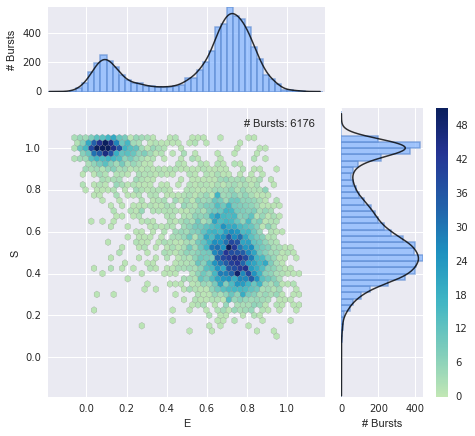

C:\Data\Antonio\data/8-spot 5samples data/2012-12-06\009_12d_100_40_pe.hdf5
#donor: 861136  #acceptor: 2121718 

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
   [DONE Counting D/A]


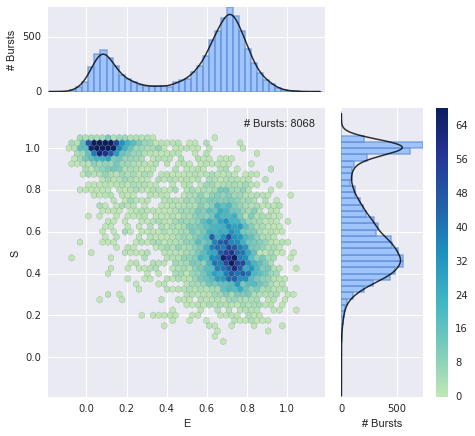

C:\Data\Antonio\data/8-spot 5samples data/2012-12-06\011_7d_100_40_pe.hdf5
#donor: 939389  #acceptor: 2325646 

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
   [DONE Counting D/A]


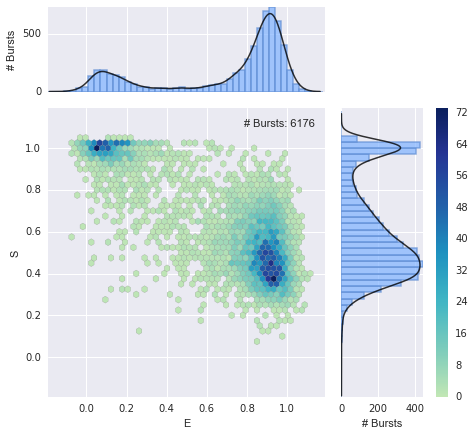

C:\Data\Antonio\data/8-spot 5samples data/2012-12-06\012_7d_100_40_po.hdf5
#donor: 672189  #acceptor: 2077908 

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
   [DONE Counting D/A]


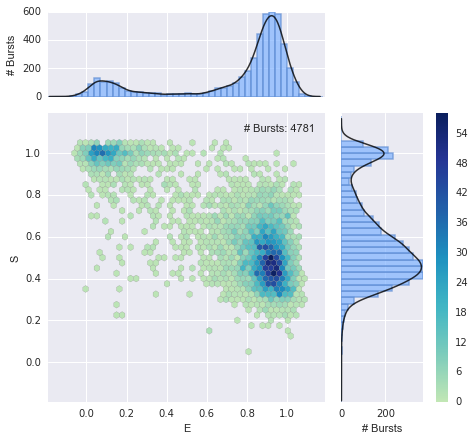

C:\Data\Antonio\data/8-spot 5samples data/2012-12-06\x005_7d_100_40_pe.hdf5
#donor: 963122  #acceptor: 2406648 

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
   [DONE Counting D/A]


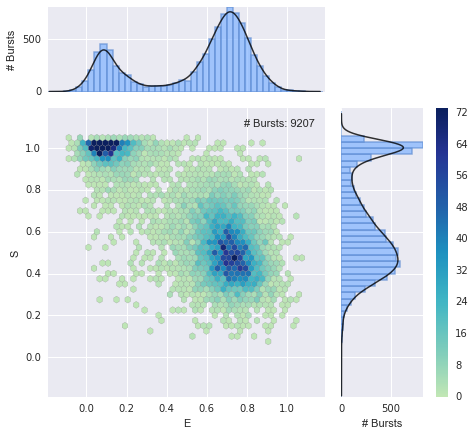

C:\Data\Antonio\data/8-spot 5samples data/2012-12-06\x006_7d_100_40_po.hdf5
#donor: 668048  #acceptor: 2144938 

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
   [DONE Counting D/A]


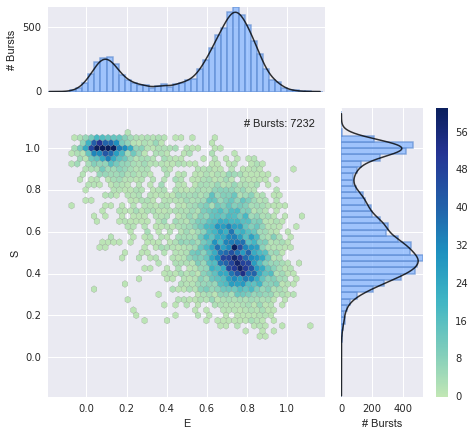

C:\Data\Antonio\data/8-spot 5samples data/2012-12-06\x007_7d_100_40_po.hdf5
#donor: 624588  #acceptor: 1902915 

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
   [DONE Counting D/A]


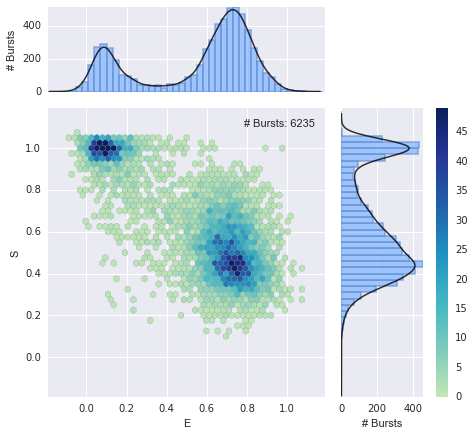

In [21]:
for fname in file_list:
    fname = fname[:-2] + 'hdf5'
    print(fname)
    if 'Dark Count' in fname: continue
    d = loader.photon_hdf5(fname)
    loader.alex_apply_period(d)
    
    d.calc_bg(fun=bg.exp_fit)
    d.burst_search()
    ds = d.select_bursts(select_bursts.size, th1=20)
    alex_jointplot(ds)
    fig = plt.gcf()
    plt.close(fig)
    display(fig)